- [Solution](https://github.com/DerwenAI/pytextrank)
- [Problem](https://github.com/DerwenAI/spaCy_tuTorial/blob/master/challenge.md)

# Programming Challenge

Starting with a text document...

  * parse the text document in `spaCy`
  * iterate through each sentence...
  * filter for `token.pos_ in ["ADJ", "NOUN", "PROPN", "VERB"]`
  * print the results

In [67]:
import spacy
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from networkx.algorithms import approximation as apxa
from collections import Counter
%matplotlib inline

In [68]:
nlp = spacy.load("en_core_web_md")

In [250]:
text = """
roger martínez given second chance, may start against pumas.

 roger martínez has become a real headache for the entire club américa time as there has been a debate for well over a month now about what the club should do with the player.
martínez had been holding out for a european move but when did not come, he turned down a pair of mls deals (rumoured to be in the range of $15m) to inter miami and los angeles galaxy – much to the chagrin of the américa heirarchy.
while there are many who support the notion to keep the colombian attacker frozen out of the squad, other fans say he should be forgiven – especially because up to nine other players could miss out due to injury or suspension.
on wednesday, it appears there was a change of heart in the américa camp as various sources, including espn, fox sports, and other major sports media, say that roger’s punishment has been lifted.
if this is true, the fact is that he would very likely start in the match against pumas this friday.
in training on wednesday, manager miguel herrera rehearsed with martínez as part of the starting squad, so everything that he will lead the line in the clásico capitalino.
since joining américa from villarreal, the 25-year-old has scored 17 goals and contributed 11 assists in 67 matches.
"""

In [187]:
text = """
Chelsea 'opted against' signing Salomon Rondón on deadline day

 Chelsea reportedly opted against signing Salomón Rondón on deadline day despite their long search for a new centre forward.
With Olivier Giroud expected to leave, the Blues targeted Edinson Cavani, Dries Mertens and Moussa Dembele – only to end up with none of them.
According to Telegraph Sport, Dalian Yifang offered Rondón to Chelsea only for them to prefer keeping Giroud at the club.
Manchester United were also linked with the Venezuela international before agreeing a deal for Shanghai Shenhua striker Odion Ighalo.
Manager Frank Lampard made no secret of his transfer window frustration, hinting that to secure top four football he ‘needed’ signings.
Their draw against Leicester on Saturday means they have won just four of the last 13 Premier League matches.
"""

In [215]:
text = """
Barcelona confirm another injury for Ousmane Dembele

 Barcelona have confirmed that winger Ousmane Dembélé has suffered yet another injury.
Dembélé hasn’t played since November 27 due to a hamstring problem, with the club now confirming another setback in training.
“During this morning’s training session, Ousmane Dembélé felt some discomfort in his right leg as a consequence of muscle fatigue,” read an official statement.
“He will continue with his rehabilitation.”
The LaLiga club have given no official time frame on his potential return date.
"""

In [251]:
doc = nlp(text)

In [252]:
for sent in doc.sents:
    print([token for token in sent if token.pos_ in ["ADJ", "NOUN", "PROPN", "VERB"]])

[roger, martínez, given, second, chance, may, start, pumas]
[roger, martínez, become, real, headache, entire, club, américa, time, debate, month, club, should, player]
[martínez, holding, european, move]
[come, turned, pair, mls, deals, rumoured, range, inter, miami, los, angeles, galaxy, chagrin, américa, heirarchy]
[many, support, notion, keep, colombian, attacker, frozen, squad, other, fans, say, should, forgiven, other, players, could, miss, injury, suspension]
[wednesday, appears, change, heart, américa, camp, various, sources, including, espn, fox, sports, other, major, sports, media, say, roger, punishment, lifted]
[true, fact, would, start, match, pumas, friday]
[training, wednesday, manager, miguel, herrera, rehearsed, martínez, part, starting, squad, will, lead, line, clásico, capitalino]
[joining, américa, villarreal, 25-year, old, scored, goals, contributed, assists, matches]


Next, construct a graph...

  * create a graph in `networkx` 
  * use `key = (token.lemma_, token.pos_)`
  * create graph nodes using the key
  * link nodes in each sentence which are within 3 hops
  * visualize the graph

In [269]:
G = nx.Graph()

In [270]:
H = [(token.lemma_, token.pos_) for token in doc if token.pos_ in ["ADJ", "NOUN", "PROPN", "VERB"]]

In [271]:
G.add_nodes_from(H)

In [272]:
edges = []
for sent in doc.sents:
    H = [(token.lemma_, token.pos_) for token in sent if token.pos_ in ["ADJ", "NOUN", "PROPN", "VERB"]]
    for hop in range(3):
        for idx, node in enumerate(H[:-1-hop]):
            nbor = H[hop + idx + 1]
            edges.append((node, nbor))

edges = [(*n, dict(weight=w)) for n, w in Counter(edges).items()]  # (2, 3, {'weight': 3.1415})

In [273]:
G.add_edges_from(edges)

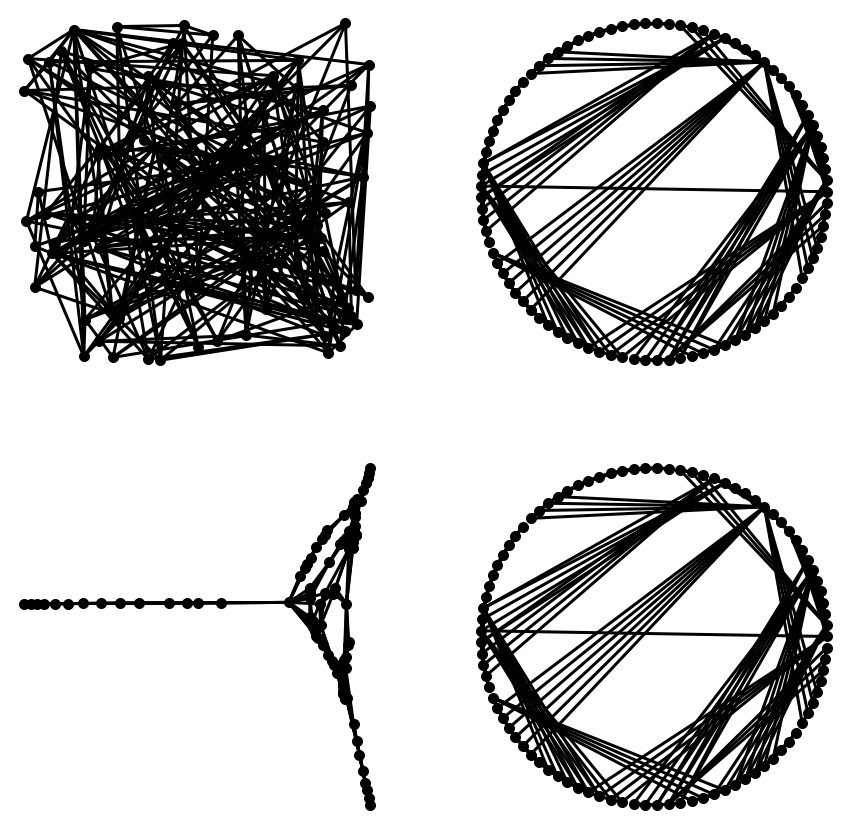

In [274]:
options = {
     'node_color': 'black',
     'node_size': 100,
     'width': 3,
 }
f, axs = plt.subplots(2,2,figsize=(15,15))
nx.draw_random(G, ax=axs[0][0], **options)
plt.subplot(222)
nx.draw_circular(G, **options)
plt.subplot(223)
nx.draw_spectral(G, **options)
plt.subplot(224)
nx.draw_shell(G, **options)

{('roger', 'PROPN'): Text(0.20609843353352758, 0.30795151111271035, 'roger'),
 ('martínez',
  'PROPN'): Text(0.32478533575918017, 0.20959595429184674, 'martínez'),
 ('give', 'VERB'): Text(0.4132993909450047, 0.24476353548961222, 'give'),
 ('second', 'ADJ'): Text(0.41031401455682526, 0.1924427062776345, 'second'),
 ('chance', 'NOUN'): Text(0.4624597305746973, 0.11579399080117292, 'chance'),
 ('may', 'VERB'): Text(0.5143400678750866, 0.10885281398404904, 'may'),
 ('start', 'VERB'): Text(0.4858885587522751, 0.024732267597917187, 'start'),
 ('pumas', 'PROPN'): Text(0.4686946313212293, -0.04380663076139172, 'pumas'),
 ('become', 'VERB'): Text(0.135166924340104, 0.15024257058066703, 'become'),
 ('real', 'ADJ'): Text(0.08291927894242902, 0.16713581248244924, 'real'),
 ('headache',
  'NOUN'): Text(0.007540998087911336, 0.08030733834854037, 'headache'),
 ('entire', 'ADJ'): Text(-0.07411195964507997, 0.049287106882694706, 'entire'),
 ('club', 'NOUN'): Text(-0.14414333784366126, 0.114991140003876

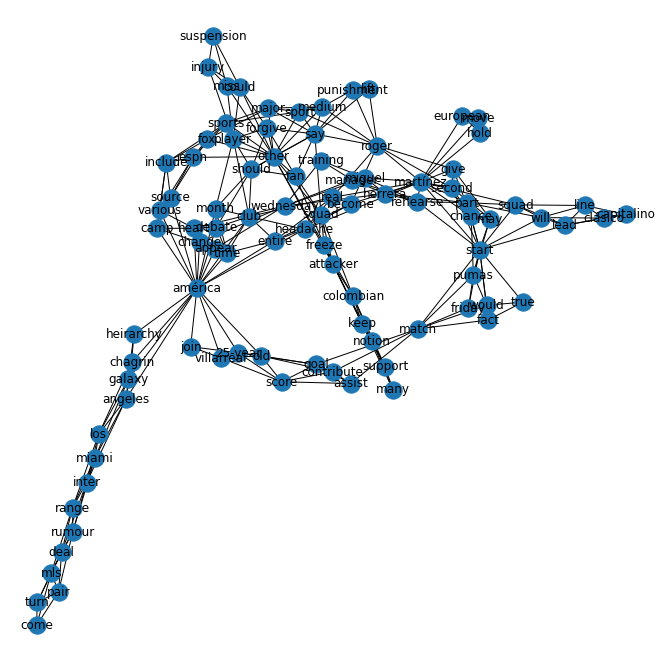

In [275]:
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(G)
labels = {k: k[0] for k, v in pos.items()}

nx.draw(G, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(G, pos, labels)


Next, rank tokens based on their "connectedness" within the graph...

  * run `pagerank()` on the graph (eigenvalue centrality)
  * print the ranks (sort descending) and their lemma values



In [276]:
pr = nx.pagerank(G, alpha=0.9)

In [277]:
[k[0] for k, v in sorted(pr.items(), key=lambda x: x[1], reverse=True)][:10]

['américa',
 'martínez',
 'start',
 'other',
 'roger',
 'say',
 'player',
 'club',
 'match',
 'should']

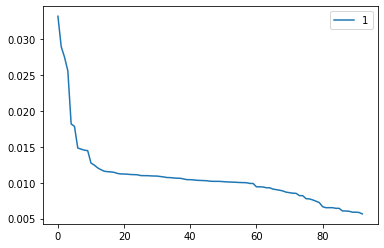

In [278]:
pd.DataFrame([(k[0],v) for k, v in sorted(pr.items(), key=lambda x: x[1], reverse=True)]).plot()

In [ ]:
# TODO: find top k idx with elbow method

Next, apply the ranks to the noun chunks within the text...

  * iterate through each noun chunk in the text document
  * sum the ranks for each token (lemma) within the noun chunk
  * print the noun chunks (sort descending)


In [279]:
phrases = {nc: sum(pr[(token.lemma_, token.pos_)] for token in nc if token.pos_ in ["ADJ", "NOUN", "PROPN", "VERB"]) for nc in doc.noun_chunks}

In [280]:
sorted(phrases.items(), key=lambda x: x[1], reverse=True)

[(the entire club américa time, 0.06670317200105555),
 (other major sports media, 0.05570571851602213),
 (inter miami and los angeles galaxy, 0.05553697823729965),
 (
  roger martínez,
  0.047131759315438296),
 (roger martínez, 0.047131759315438296),
 (the américa camp, 0.04362558421596373),
 (up to nine other players, 0.0404214975080167),
 (the américa heirarchy, 0.03909298162494734),
 (the starting squad, 0.03844635285314193),
 (other fans, 0.035663386684501926),
 (américa, 0.033200813427187385),
 (manager miguel herrera, 0.03119215100886219),
 (martínez, 0.028946415585828965),
 (martínez, 0.028946415585828965),
 (roger’s punishment, 0.025418896531171298),
 (mls deals, 0.023889722808791564),
 (the colombian attacker, 0.022076215116796326),
 (second chance, 0.020951826865613137),
 (various sources, 0.02061815319367559),
 (a real headache, 0.020376806150320212),
 (fox sports, 0.02026193487354894),
 (the player, 0.014835602671373663),
 (the club, 0.01468218955819932),
 (the clásico capi

Extras:

  * use `spacy-wordnet` to add links among hypernyms and hyponyms
  * restrict the WordNet domains to specific areas of interest
  * how could you use noun chunks and entities within the graph?
  
for wordnet, see https://github.com/DerwenAI/spaCy_tuTorial/blob/master/spaCy_tuTorial.ipynb
wordnet does not support german (but does support everything else)

for using noun chunks and entities within the graph https://github.com/DerwenAI/pytextrank/blob/master/explain_algo.ipynb

In [230]:
list(nx.articulation_points(G))

[]

In [231]:
k_components = apxa.k_components(G, min_density=0.95)

In [246]:
max(k_components)

4

In [247]:
subg = G.subgraph([e for c in k_components[max(k_components)] for e in c])

{('Barcelona',
  'PROPN'): Text(-0.8558029495691278, -0.35665856493653925, 'Barcelona'),
 ('Dembele', 'PROPN'): Text(-0.820919025770279, 0.1818969528740435, 'Dembele'),
 ('November', 'PROPN'): Text(1.0, 0.2118141483210867, 'November'),
 ('winger', 'NOUN'): Text(-0.5464899923792047, 0.34262340487060694, 'winger'),
 ('suffer', 'VERB'): Text(-0.9953170274707863, 0.027186011648513364, 'suffer'),
 ('injury', 'NOUN'): Text(-0.5186724922920682, -0.38178132501110484, 'injury'),
 ('play', 'VERB'): Text(0.8202484560278378, 0.561765588150174, 'play'),
 ('Ousmane',
  'PROPN'): Text(-0.5227124014483157, -0.04071875732424356, 'Ousmane'),
 ('club', 'NOUN'): Text(0.8190377258818595, -0.4824464135495095, 'club'),
 ('problem',
  'NOUN'): Text(0.9706183543166926, -0.13349853113628785, 'problem'),
 ('confirm',
  'VERB'): Text(-0.002824821171661774, -0.19012688890768703, 'confirm'),
 ('Dembélé',
  'PROPN'): Text(0.035660053027419716, 0.21812304166893665, 'Dembélé'),
 ('hamstring',
  'NOUN'): Text(0.6171741

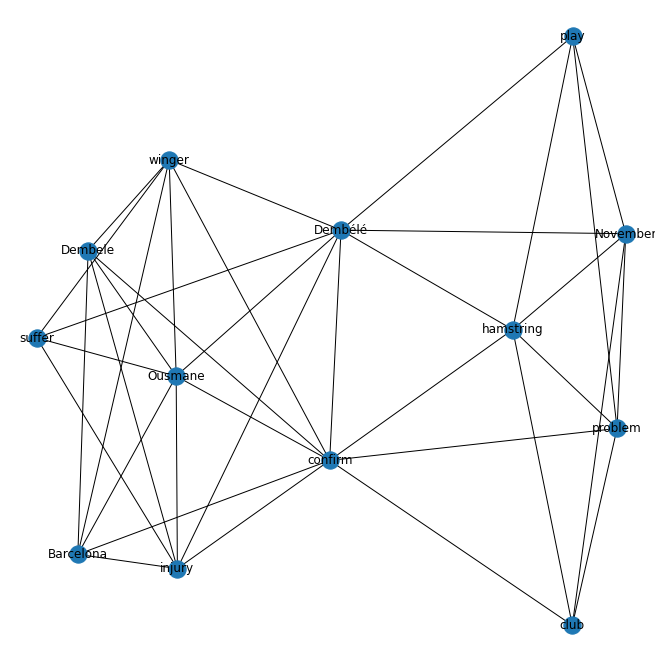

In [240]:
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(subg)
labels = {k: k[0] for k, v in pos.items()}

nx.draw(subg, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(subg, pos, labels)

In [241]:
def greedy_degree_density(G):
	""" 
	Returns the subgraph with optimal degree density using 
	Charikar's greedy algorithm
    """
	neighbors=G.neighbors
	degrees=dict(G.degree())
	sum_degrees = sum(degrees.values())
	num_nodes = G.number_of_nodes()
	nodes=sorted(degrees,key=degrees.get)
	bin_boundaries=[0]
	curr_degree=0
	for i,v in enumerate(nodes):
		if degrees[v]>curr_degree:
			bin_boundaries.extend([i]*(degrees[v]-curr_degree))
			curr_degree=degrees[v]
	node_pos = dict((v,pos) for pos,v in enumerate(nodes))
	nbrs=dict((v,set(neighbors(v))) for v in G)
		
	max_degree_density = sum_degrees/float(num_nodes)
	ind = 0 
		
	for v in nodes:
		num_nodes -= 1
		while degrees[v] > 0:
			pos=node_pos[v]
			bin_start=bin_boundaries[degrees[v]]
			node_pos[v]=bin_start
			node_pos[nodes[bin_start]]=pos
			nodes[bin_start],nodes[pos]=nodes[pos],nodes[bin_start]
			bin_boundaries[degrees[v]]+=1
			degrees[v]-=1
		
		for u in nbrs[v]:
			
			nbrs[u].remove(v)
			pos=node_pos[u]
			bin_start=bin_boundaries[degrees[u]]
			node_pos[u]=bin_start
			node_pos[nodes[bin_start]]=pos
			nodes[bin_start],nodes[pos]=nodes[pos],nodes[bin_start]
			bin_boundaries[degrees[u]]+=1
			degrees[u]-=1
			sum_degrees -= 2
		
		
		if num_nodes > 0:
			current_degree_density = sum_degrees/float(num_nodes)
			if current_degree_density > max_degree_density:
				max_degree_density = current_degree_density
				ind = G.number_of_nodes()-num_nodes
				
	optimal_nodes = nodes[ind:]
		
	return G.subgraph(optimal_nodes)


In [242]:
subg = greedy_degree_density(G)

{('Barcelona',
  'PROPN'): Text(-0.3442880878449064, 0.66961836115969, 'Barcelona'),
 ('confirm',
  'VERB'): Text(-0.0007218286853291274, 0.42811794537714565, 'confirm'),
 ('injury', 'NOUN'): Text(-0.23055500006295188, 0.5365329181693959, 'injury'),
 ('Ousmane',
  'PROPN'): Text(-0.25386245870650415, 0.2568817242471347, 'Ousmane'),
 ('Dembele', 'PROPN'): Text(-0.450387622714773, 0.5507278938130349, 'Dembele'),
 ('winger', 'NOUN'): Text(-0.30192710876799694, 0.4354248414213106, 'winger'),
 ('Dembélé',
  'PROPN'): Text(0.003680637595131609, 0.13922621142497257, 'Dembélé'),
 ('suffer', 'VERB'): Text(-0.10790495851457332, 0.5729936040114154, 'suffer'),
 ('play', 'VERB'): Text(0.547203404088887, 0.29324630448519406, 'play'),
 ('November',
  'PROPN'): Text(0.47880209635933274, 0.14492463577933143, 'November'),
 ('hamstring',
  'NOUN'): Text(0.3284636316786757, 0.28216309779742477, 'hamstring'),
 ('problem', 'NOUN'): Text(0.43241172296819325, 0.4209014778339212, 'problem'),
 ('club', 'NOUN'):

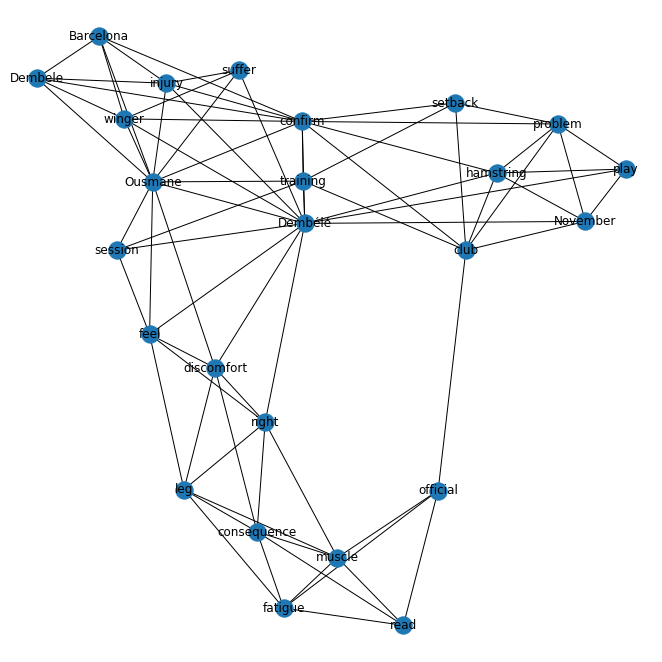

In [243]:
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(subg)
labels = {k: k[0] for k, v in pos.items()}

nx.draw(subg, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(subg, pos, labels)

In [244]:
subg = G.subgraph(apxa.dominating_set.min_weighted_dominating_set(G))

{('Barcelona',
  'PROPN'): Text(-0.1204547428710376, 0.2962543756269734, 'Barcelona'),
 ('confirm',
  'VERB'): Text(-0.07265434835169647, 0.15996811178148918, 'confirm'),
 ('injury', 'NOUN'): Text(-0.18037167991951458, 0.24273509458692416, 'injury'),
 ('Ousmane',
  'PROPN'): Text(-0.12379864223297318, 0.16351032233515633, 'Ousmane'),
 ('winger', 'NOUN'): Text(-0.082910301793099, 0.2499246367675659, 'winger'),
 ('Dembélé',
  'PROPN'): Text(-0.1630780806286876, 0.1306525538183137, 'Dembélé'),
 ('play', 'VERB'): Text(-0.27834419061713506, 0.09058845786172792, 'play'),
 ('problem',
  'NOUN'): Text(-0.1359517512621616, 0.04924306199306634, 'problem'),
 ('club', 'NOUN'): Text(0.01714957713138347, -0.010100536744897142, 'club'),
 ('training',
  'NOUN'): Text(-0.03049016522771711, 0.10434517019325534, 'training'),
 ('feel', 'VERB'): Text(-0.1423029769859804, -0.03755326560159649, 'feel'),
 ('leg', 'NOUN'): Text(-0.08629830123850374, -0.25506118031308594, 'leg'),
 ('consequence',
  'NOUN'): Tex

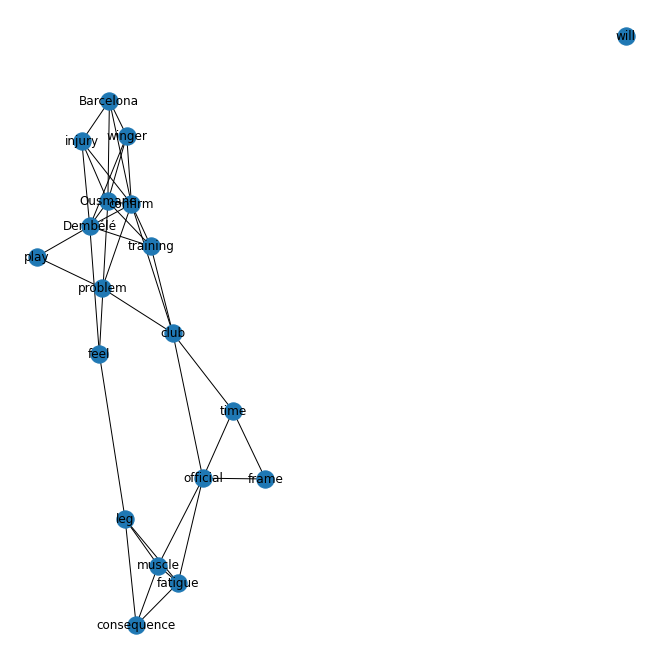

In [245]:
fig = plt.figure(figsize=(9, 9))
pos = nx.spring_layout(subg)
labels = {k: k[0] for k, v in pos.items()}

nx.draw(subg, pos=pos, with_labels=False, font_weight="bold")
nx.draw_networkx_labels(subg, pos, labels)

In [212]:
import pytextrank

In [ ]:
tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)

doc = nlp(text)

In [248]:
# examine the top-ranked phrases in the document
for p in doc._.phrases:
    print("{:.4f} {:5d}  {}".format(p.rank, p.count, p.text))
    print(p.chunks)

0.1499     3  ousmane dembélé
[Ousmane Dembélé, Ousmane Dembélé, Ousmane Dembélé]
0.1496     1  winger ousmane dembélé
[winger Ousmane Dembélé]
0.1090     2  dembélé
[Dembélé, Dembélé]
0.0970     1  muscle fatigue
[muscle fatigue]
0.0872     2  ousmane dembele

 barcelona
[Ousmane Dembele

 Barcelona, Ousmane Dembele

 Barcelona]
0.0795     1  training
[training]
0.0786     1  no official time frame
[no official time frame]
0.0697     1  his potential return date
[his potential return date]
0.0631     1  an official statement
[an official statement]
0.0629     1  laliga
[LaLiga]
0.0594     1  a hamstring problem
[a hamstring problem]
0.0534     2  november
[November, November 27]
0.0522     1  the laliga club
[The LaLiga club]
0.0518     1  this morning’s training session
[this morning’s training session]
0.0517     1  his right leg
[his right leg]
0.0440     2  another injury
[another injury, yet another injury]
0.0438     1  
barcelona
[
Barcelona]
0.0435     1  a consequence
[a cons